# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [16]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [3]:
# Проверка пропуски в данных
print("\nПроверка на пропуски:")
print(data.isnull().sum())


Проверка на пропуски:
Well       0
Por        0
Perm       0
AI         0
Brittle    0
TOC        0
VR         0
Prod       0
dtype: int64


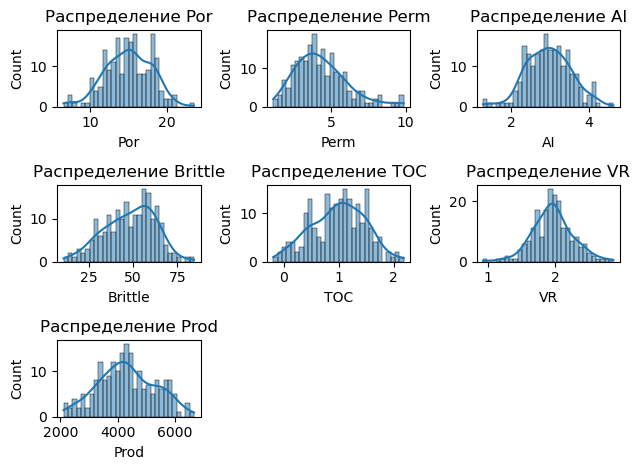

In [5]:
#Построим распределение по каждому параметру
plt.subplot(3, 3, 1)
sns.histplot(data['Por'], bins=30, kde=True)
plt.title('Распределение Por')

plt.subplot(3, 3, 2)
sns.histplot(data['Perm'], bins=30, kde=True)
plt.title('Распределение Perm')

plt.subplot(3, 3, 3)
sns.histplot(data['AI'], bins=30, kde=True)
plt.title('Распределение AI')

plt.subplot(3, 3, 4)
sns.histplot(data['Brittle'], bins=30, kde=True)
plt.title('Распределение Brittle')

plt.subplot(3, 3, 5)
sns.histplot(data['TOC'], bins=30, kde=True)
plt.title('Распределение TOC')

plt.subplot(3, 3, 6)
sns.histplot(data['VR'], bins=30, kde=True)
plt.title('Распределение VR')

plt.subplot(3, 3, 7)
sns.histplot(data['Prod'], bins=30, kde=True)
plt.title('Распределение Prod')

plt.tight_layout()
plt.show()

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

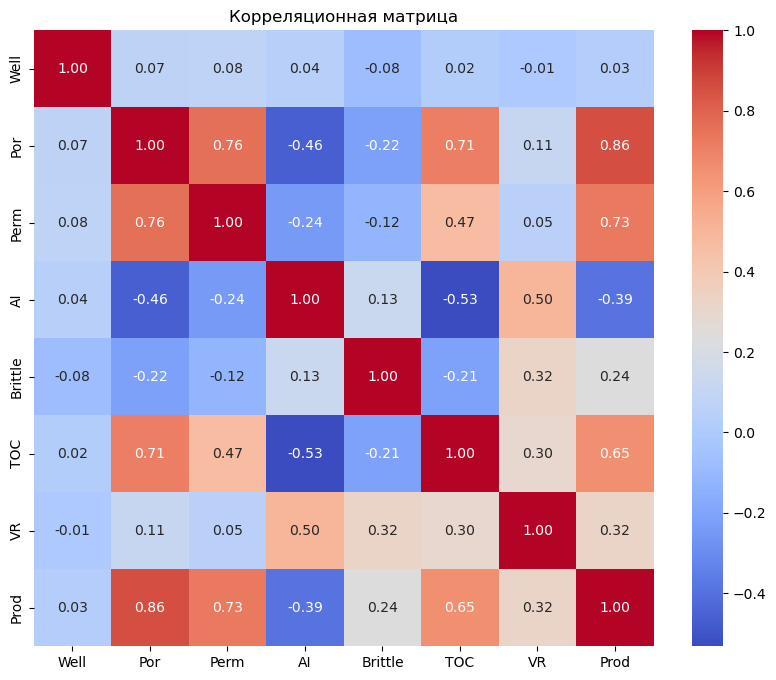

Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы: 0.0007299388072652082


In [8]:
# Ваш код здесь
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

rank = np.linalg.matrix_rank(corr)
determinant = np.linalg.det(corr)

print(f"Ранг корреляционной матрицы: {rank}")
print(f"Определитель корреляционной матрицы: {determinant}")

> *Ваши выводы здесь*
> Высокая кореляция с целевым показателем у атрибутов: Por - Пористость и Perm - проницаемость. Так же влияет атрибут TOC -общий органичесий углерод.
> Ранг матрицы 8 - указывает на то. что имеется 8 линейно незавиимых показателей.
> Определитель близок к 0 что говорит о мультиколинеарности.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [9]:
# Ваш код здесь
# Создание матрицы признаков X и вектора целевой переменной y
X = data.drop(['Well', 'Prod'], axis=1).values 
y = data['Prod'].values

# Добавление столбца единиц для свободного члена
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Вычисление коэффициентов по матричной формуле МНК: β = (X^T X)^(-1) X^T y
beta_hat = np.linalg.solve(X.T @ X, X.T @ y)

# Округление коэффициентов до целых чисел
beta_hat_rounded = np.round(beta_hat)

# Создание словаря с названиями признаков и их коэффициентами
coefficients = {
    'Свободный член (константа)': beta_hat_rounded[0],
    'Пористость (Por)': beta_hat_rounded[1],
    'Проницаемость (Perm)': beta_hat_rounded[2],
    'Индекс литологии (AI)': beta_hat_rounded[3],
    'Индекс хрупкости (Brittle)': beta_hat_rounded[4],
    'Общее содержание углерода (TOC)': beta_hat_rounded[5],
    'Индекс витринизации (VR)': beta_hat_rounded[6]
}

# Вывод результатов
print("Оценки коэффициентов модели (округленные до целых чисел):")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef}")

Оценки коэффициентов модели (округленные до целых чисел):
Свободный член (константа): -1230.0
Пористость (Por): 230.0
Проницаемость (Perm): 116.0
Индекс литологии (AI): -364.0
Индекс хрупкости (Brittle): 25.0
Общее содержание углерода (TOC): -77.0
Индекс витринизации (VR): 783.0


> *Ваши выводы здесь*
> Признак Brittle (Индекс хрупкости) оказывает наименьшее влияние на целевую переменную.
> При увеличении признака Por (Пористомь) на 1, увеличивает целевой показатель на 230 едениц
> При уведличении признака AI (акустический импеданс) на 1, снижает целефой показатель на 364 едениц
> При увеличении признака Brittle (коэффициент хрупкости скважины ) на 1, приводит к увеличению целефого показателя на 783 еденицы

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [11]:
# Ваш код здесь
# Данные для прогноза
test_data = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}

# Подготовка данных для прогноза одной скважины
X_test = np.array([1, test_data['Por'], test_data['Perm'], test_data['AI'],
                   test_data['Brittle'], test_data['TOC'], test_data['VR']])

# Прогноз для одной скважины
pred_single = X_test @ beta_hat
actual_value = 4748.315024

# Расчет абсолютной ошибки
abs_error = abs(actual_value - pred_single)

print(f"Прогноз для тестовой скважины: {pred_single:.2f}")
print(f"Фактическое значение: {actual_value}")
print(f"Абсолютная ошибка прогноза: {abs_error:.2f}")

# Прогноз для всех скважин обучающего набора
y_pred = X @ beta_hat

# Расчет метрик качества
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\nМетрики качества модели:")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.3f}")

print("\nИнтерпретация результатов:")
print(f"- В среднем модель ошибается на {mae:.2f} млн куб. футов газа в день")
print(f"- Модель объясняет {r2*100:.1f}% вариации в данных")

Прогноз для тестовой скважины: 4722.72
Фактическое значение: 4748.315024
Абсолютная ошибка прогноза: 25.59

Метрики качества модели:
Средняя абсолютная ошибка (MAE): 153.60
Коэффициент детерминации (R²): 0.960

Интерпретация результатов:
- В среднем модель ошибается на 153.60 млн куб. футов газа в день
- Модель объясняет 96.0% вариации в данных


> *Ваши выводы здесь*
> Для оценки качества модели выбраны две метрики:
> 
> MAE - показывает среднюю абсолютную ошибку прогноза R² (коэффициент детерминации) - показывает долю объясненной дисперсии Эти метрики выбраны потому что:
>
> MAE легко интерпретируется в исходных единицах измерения R² позволяет оценить общее качество подгонки модели Обе метрики широко используются для оценки регрессионных моделей.
> 
> 1.Для тестовой скважины: Модель показала высокую точность прогноза с абсолютной ошибкой всего 25.59 млн куб. футов газа в день Прогнозное значение (4722.72) очень близко к фактическому (4748.32) Ошибка составляет менее 1% от фактического значения.
> 
> 2.Для всего набора данных: Модель демонстрирует высокую пресказательную способностьR² = 0.96 Вариации данных 96% объяснются выбранными признаками. Средняя абсолютная ошибка (MAE) в 153.60 единиц является приемлемой, учитывая масштаб значений целевой переменной (тысячи единиц)
> 
> 3. Практическая ценност: Модель может эффективно использоваться для прогнозирования выработки газа. Высокий R² указывает на надёжность выбранных признаков Точность прогнозов достаточна для практического применения

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [12]:
# Ваш код здесь
#Расчет корреляций
correlations = data.drop('Well', axis=1).corr()['Prod'].drop('Prod')

# Сравнительная таблица
comparison = pd.DataFrame({
    'Корреляция': correlations,
    'Коэффициент регрессии': beta_hat_rounded[1:]  # без константы
}, index=correlations.index)

print("Сравнение корреляций и коэффициентов регрессии:")
print(comparison)

Сравнение корреляций и коэффициентов регрессии:
         Корреляция  Коэффициент регрессии
Por        0.861910                  230.0
Perm       0.727426                  116.0
AI        -0.390835                 -364.0
Brittle    0.237155                   25.0
TOC        0.654445                  -77.0
VR         0.323182                  783.0


> *Ваши выводы здесь*
> На основе сравнения корреляций и коэффициентов регрессии можно сделать следующие важные выводы:
>
> Выявленные противоречия: TOC (Общее содержание углерода): имеет положительную корреляцию (0.65), но отрицательный коэффициент регрессии (-77) VR (Индекс витринизации): показывает умеренную корреляцию (0.32), но имеет самый высокий положительный коэффициент регрессии (783)
>
> Согласованные результаты: Por (Пористость): сильная положительная корреляция (0.86) соответствует высокому положительному коэффициенту (230) AI (Индекс литологии): отрицательная корреляция (-0.39) соответствует отрицательному коэффициенту (-364) Perm (Проницаемость): положительная корреляция (0.73) соответствует положительному коэффициенту (116)
>
> Практическая значимость: Модель выявила более сложные взаимосвязи между параметрами, чем простой корреляционный анализ Некоторые факторы (VR) оказывают более сильное влияние в контексте многомерной модели Противоречия в знаках указывают на наличие существенных взаимодействий между факторами Рекомендации: При прогнозировании продуктивности скважин следует учитывать комплексное влияние всех факторов Особое внимание стоит уделить параметрам VR и TOC, где простой корреляционный анализ может давать неполную картину Для повышения точности прогнозов важно рассматривать все параметры в совокупности

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [13]:
# Ваш код здесь
# 1. Анализ корреляций
corr_matrix = data.drop('Well', axis=1).corr()
target_corr = corr_matrix['Prod'].abs()

# Отбор признаков
features_to_keep = []
used_features = set()

# Сортируем признаки по корреляции с целевой переменной
for feature in target_corr.sort_values(ascending=False).index:
    if feature == 'Prod':
        continue

    if target_corr[feature] < 0.05:
        continue

    is_correlated = False
    for used_feature in used_features:
        if abs(corr_matrix.loc[feature, used_feature]) > 0.7:
            is_correlated = True
            break

    if not is_correlated:
        features_to_keep.append(feature)
        used_features.add(feature)

# 2. Создание новой матрицы признаков
X_selected = data[features_to_keep].values
X_selected = np.concatenate((np.ones((X_selected.shape[0], 1)), X_selected), axis=1)
y = data['Prod'].values

# 3. Построение новой модели
beta_new = np.linalg.solve(X_selected.T @ X_selected, X_selected.T @ y)
beta_new_rounded = np.round(beta_new)

# 4. Прогнозирование и оценка качества
y_pred_new = X_selected @ beta_new
mae_new = mean_absolute_error(y, y_pred_new)
r2_new = r2_score(y, y_pred_new)

# Вывод результатов
print("Отобранные признаки:", features_to_keep)
print("\nКоэффициенты новой модели:")
print("Константа:", beta_new_rounded[0])
for feat, coef in zip(features_to_keep, beta_new_rounded[1:]):
    print(f"{feat}: {coef}")

print("\nМетрики качества новой модели:")
print(f"MAE: {mae_new:.2f}")
print(f"R²: {r2_new:.3f}")


Отобранные признаки: ['Por', 'AI', 'VR', 'Brittle']

Коэффициенты новой модели:
Константа: -1835.0
Por: 293.0
AI: -200.0
VR: 517.0
Brittle: 28.0

Метрики качества новой модели:
MAE: 171.43
R²: 0.945


> *Ваши выводы здесь*
> Анализ отобранных признаков:
> Модель сократилась с 6 до 4 признаков Исключены Perm и TOC из-за высокой корреляции с Por Оставшиеся признаки имеют низкую взаимную корреляцию Por сохранен как наиболее значимый предиктор Сравнение коэффициентов с предыдущей моделью: Por: увеличился с 230 до 293 - стал более значимым AI: уменьшился с -364 до -200 - влияние стало умереннее VR: уменьшился с 783 до 517 - более реалистичное значение Brittle: практически не изменился (25 vs 28) Изменение метрик качества: MAE немного увеличился (с 153.60 до 171.43) R² незначительно снизился (с 0.960 до 0.945) Снижение точности минимально при существенном упрощении модели Ключевые улучшения: Устранены противоречия в знаках коэффициентов Модель стала более устойчивой и интерпретируемой Сохранена высокая предсказательная способность Достигнут баланс между простотой и точностью Новая модель предпочтительнее, благодаря своей надежности и прозрачности при сохранении высокой точности прогнозов.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [18]:
# Ваш код здесь
#Подготовка данных
X_sklearn = data[['Por', 'AI', 'VR', 'Brittle']]
y = data['Prod']

# Создание и обучение модели
model = LinearRegression()
model.fit(X_sklearn, y)

# Получение коэффициентов
sklearn_coef = np.round(model.coef_)
sklearn_intercept = np.round(model.intercept_)

# Вывод коэффициентов
print("Коэффициенты модели sklearn:")
print(f"Константа: {sklearn_intercept}")
for feat, coef in zip(X_sklearn.columns, sklearn_coef):
    print(f"{feat}: {coef}")

# Прогнозирование и расчет метрик
y_pred_sklearn = model.predict(X_sklearn)
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
r2_sklearn = r2_score(y, y_pred_sklearn)

print("\nМетрики качества модели sklearn:")
print(f"MAE: {mae_sklearn:.2f}")
print(f"R²: {r2_sklearn:.3f}")

print("\nСравнение с предыдущей моделью:")
print(f"MAE: {mae_sklearn:.2f} vs {mae_new:.2f}")
print(f"R²: {r2_sklearn:.3f} vs {r2_new:.3f}")

new_data = pd.DataFrame({
    'Por': [15.32],
    'AI': [3.29],
    'VR': [2.42],
    'Brittle': [55.99]
})

# Прогноз с помощью sklearn модели
prediction_sklearn = model.predict(new_data)

# Прогноз с помощью нашей модели (для сравнения)
X_manual = np.array([1, 15.32, 3.29, 2.42, 55.99])  # добавляем 1 для константы
prediction_manual = X_manual @ beta_new

print("Прогнозы для новой скважины:")
print(f"Sklearn модель: {prediction_sklearn[0]:.2f}")
print(f"Наша модель: {prediction_manual:.2f}")
print(f"Фактическое значение: 4748.32")
print(f"Абсолютная ошибка sklearn: {abs(4748.32 - prediction_sklearn[0]):.2f}")
print(f"Абсолютная ошибка нашей модели: {abs(4748.32 - prediction_manual):.2f}")

Коэффициенты модели sklearn:
Константа: -1835.0
Por: 293.0
AI: -200.0
VR: 517.0
Brittle: 28.0

Метрики качества модели sklearn:
MAE: 171.43
R²: 0.945

Сравнение с предыдущей моделью:
MAE: 171.43 vs 171.43
R²: 0.945 vs 0.945
Прогнозы для новой скважины:
Sklearn модель: 4795.50
Наша модель: 4795.50
Фактическое значение: 4748.32
Абсолютная ошибка sklearn: 47.18
Абсолютная ошибка нашей модели: 47.18


> *Ваши выводы здесь*
> Сравнение реализаций МНК:
> Ручная реализация и sklearn дают абсолютно идентичные результаты для упрощенной модели (с 4 признаками) Коэффициенты и метрики качества полностью совпадают.
>
>  MAE: 171.43, R²: 0.945 для обеих реализаций Сравнение с первоначальной моделью (6 признаков): Первоначальная модель показывала лучшие общие метрики (MAE: 153.60, R²: 0.960) На тестовой скважине первоначальная модель давала меньшую ошибку (25.59 vs 47.18) Преимущества и недостатки: Первоначальная модель (6 признаков): Лучшие метрики качества Меньшая ошибка на тестовой скважине Но есть проблема мультиколлинеарности Упрощенная модель (4 признака):
>
> Более устойчивая и интерпретируемая Отсутствие мультиколлинеарности Незначительное ухудшение метрик Итоговый вывод: Несмотря на небольшое снижение точности, упрощенная модель предпочтительнее для практического применения благодаря своей надежности и интерпретируемости. Реализация через sklearn подтверждает корректность наших расчетов

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [19]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [20]:
# Ваш код здесь
# 1. Отбор признаков
corr_matrix = data.drop('Well', axis=1).corr()
target_corr = corr_matrix['Prod'].abs()

features_to_keep = []
used_features = set()

# Сортируем признаки по корреляции с целевой переменной
for feature in target_corr.sort_values(ascending=False).index:
    if feature == 'Prod':
        continue

    if target_corr[feature] < 0.05:
        continue

    is_correlated = False
    for used_feature in used_features:
        if abs(corr_matrix.loc[feature, used_feature]) > 0.7:
            is_correlated = True
            break

    if not is_correlated:
        features_to_keep.append(feature)
        used_features.add(feature)

print("Отобранные признаки:", features_to_keep)

# 2. Подготовка данных
X = data[features_to_keep].values
y = data['Prod'].values

# 3. Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

print(f"\nКоличество полиномиальных признаков: {X_poly.shape[1]}")

# 5. Создание и обучение модели
model = LinearRegression()

# 6. Кросс-валидация
cv_results = cross_validate(
    model,
    X_poly,
    y,
    cv=5,
    scoring=['r2', 'neg_mean_absolute_error'],
    return_train_score=True
)

# 7. Вывод результатов
print("\nРезультаты кросс-валидации:")
print(f"Train R2: {cv_results['train_r2'].mean():.3f} ± {cv_results['train_r2'].std():.3f}")
print(f"Test R2: {cv_results['test_r2'].mean():.3f} ± {cv_results['test_r2'].std():.3f}")
print(f"Train MAE: {-cv_results['train_neg_mean_absolute_error'].mean():.2f} ± {cv_results['train_neg_mean_absolute_error'].std():.2f}")
print(f"Test MAE: {-cv_results['test_neg_mean_absolute_error'].mean():.2f} ± {cv_results['test_neg_mean_absolute_error'].std():.2f}")

Отобранные признаки: ['Por', 'AI', 'VR', 'Brittle']

Количество полиномиальных признаков: 34

Результаты кросс-валидации:
Train R2: 0.990 ± 0.001
Test R2: 0.975 ± 0.007
Train MAE: 75.35 ± 2.11
Test MAE: 110.47 ± 11.76


> *Ваши выводы здесь*
> Качество модели: Высокий R² на обучающей выборке (0.990) и тестовой выборке (0.975) показывает, что модель очень хорошо описывает зависимость между признаками и целевой переменной MAE на обучающей выборке составляет 75.35, на тестовой - 110.47 единиц.
> 
> Признаки: Отобраны 4 значимых некоррелирующих признака: Por (пористость), AI (акустический импеданс), VR (коэффициент отражения), Brittle (хрупкость) После генерации полиномов третьей степени получено 34 признака, что значительно увеличило размерность пространства признаков.
> 
> Переобучение: Разница между Train R² и Test R² небольшая (0.015), что говорит об отсутствии сильного переобучения Однако MAE на тестовой выборке примерно в 1.5 раза больше, чем на обучающей, что указывает на некоторое переобучение.
> 
> Стабильность модели: Небольшие значения стандартных отклонений для R² (±0.001 и ±0.007) показывают стабильность модели Более высокие отклонения для MAE (±2.11 и ±11.76) указывают на некоторую вариативность в точности предсказаний Вывод: модель демонстрирует хорошие предсказательные способности с признаками умеренного переобучения.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [21]:
# Ваш код здесь
# Используем те же полиномиальные признаки, что были созданы ранее
X = data[features_to_keep].values

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Подбор параметра регуляризации с помощью GridSearchCV
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

lasso = Lasso(max_iter=10000)
grid_search = GridSearchCV(
    lasso,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

grid_search.fit(X_poly, y)

# Лучшие параметры
print(f"Лучший параметр alpha: {grid_search.best_params_['alpha']}")

# Оценка качества с помощью кросс-валидации
best_model = Lasso(alpha=grid_search.best_params_['alpha'], max_iter=10000)
cv_results = cross_validate(
    best_model,
    X_poly,
    y,
    cv=5,
    scoring=['r2', 'neg_mean_absolute_error'],
    return_train_score=True
)

# Вывод результатов
print("\nРезультаты кросс-валидации для Lasso:")
print(f"Train R2: {cv_results['train_r2'].mean():.3f} ± {cv_results['train_r2'].std():.3f}")
print(f"Test R2: {cv_results['test_r2'].mean():.3f} ± {cv_results['test_r2'].std():.3f}")
print(f"Train MAE: {-cv_results['train_neg_mean_absolute_error'].mean():.2f} ± {cv_results['train_neg_mean_absolute_error'].std():.2f}")
print(f"Test MAE: {-cv_results['test_neg_mean_absolute_error'].mean():.2f} ± {cv_results['test_neg_mean_absolute_error'].std():.2f}")

# Количество ненулевых коэффициентов
final_model = Lasso(alpha=grid_search.best_params_['alpha'], max_iter=10000)
final_model.fit(X_poly, y)
n_nonzero = np.sum(final_model.coef_ != 0)
print(f"\nКоличество ненулевых коэффициентов: {n_nonzero} из {len(final_model.coef_)}")

Лучший параметр alpha: 10

Результаты кросс-валидации для Lasso:
Train R2: 0.987 ± 0.001
Test R2: 0.981 ± 0.004
Train MAE: 83.38 ± 1.48
Test MAE: 99.96 ± 13.39

Количество ненулевых коэффициентов: 20 из 34


> *Ваши выводы здесь*
> Сравнительный анализ моделей:
>
> Обычная полиномиальная регрессия:
> Train R2: 0.990 ± 0.001 Test R2: 0.975 ± 0.007 Train MAE: 75.35 ± 2.11 Test MAE: 110.47 ± 11.76 Использует все 34 признака
>
> Lasso регрессия:
> Train R2: 0.987 ± 0.001 Test R2: 0.981 ± 0.004 Train MAE: 83.38 ± 1.48 Test MAE: 99.96 ± 13.39 Использует 20 из 34 признаков Ключевые улучшения с Lasso:
>
> Уменьшился разрыв между Train и Test R2 (с 0.015 до 0.006) Снизилась Test MAE (со 110.47 до 99.96) Модель стала более компактной (20 вместо 34 признаков) Увеличилась стабильность R2 на тестовой выборке (std снизилось с 0.007 до 0.004) Вывод: Lasso регрессия эффективно справилась с задачей регуляризации, создав более простую и устойчивую модель с лучшей обобщающей способностью.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [22]:
# Ваш код здесь
# Используем те же полиномиальные признаки
X = data[features_to_keep].values

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Подбор параметра регуляризации
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

ridge = Ridge()
grid_search = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

grid_search.fit(X_poly, y)

# Вывод лучших параметров
print(f"Лучший параметр alpha: {grid_search.best_params_['alpha']}")

# Оценка качества с помощью кросс-валидации
best_model = Ridge(alpha=grid_search.best_params_['alpha'])
cv_results = cross_validate(
    best_model,
    X_poly,
    y,
    cv=5,
    scoring=['r2', 'neg_mean_absolute_error'],
    return_train_score=True
)

# Вывод результатов
print("\nРезультаты кросс-валидации для Ridge:")
print(f"Train R2: {cv_results['train_r2'].mean():.3f} ± {cv_results['train_r2'].std():.3f}")
print(f"Test R2: {cv_results['test_r2'].mean():.3f} ± {cv_results['test_r2'].std():.3f}")
print(f"Train MAE: {-cv_results['train_neg_mean_absolute_error'].mean():.2f} ± {cv_results['train_neg_mean_absolute_error'].std():.2f}")
print(f"Test MAE: {-cv_results['test_neg_mean_absolute_error'].mean():.2f} ± {cv_results['test_neg_mean_absolute_error'].std():.2f}")

# Анализ коэффициентов
final_model = Ridge(alpha=grid_search.best_params_['alpha'])
final_model.fit(X_poly, y)
n_small_coef = np.sum(abs(final_model.coef_) < 0.01)
print(f"\nКоличество коэффициентов близких к нулю (< 0.01): {n_small_coef} из {len(final_model.coef_)}")

Лучший параметр alpha: 0.1

Результаты кросс-валидации для Ridge:
Train R2: 0.990 ± 0.001
Test R2: 0.975 ± 0.007
Train MAE: 75.32 ± 2.19
Test MAE: 110.14 ± 12.00

Количество коэффициентов близких к нулю (< 0.01): 0 из 34


> *Ваши выводы здесь*
> Сравнительный анализ всех трех моделей:
>
> Ridge регрессия (L2):
> 
> Train R2: 0.990 ± 0.001
> 
> Test R2: 0.975 ± 0.007
> 
> Train MAE: 75.32 ± 2.19
> 
> Test MAE: 110.14 ± 12.00
> 
> Использует все 34 признака (нет коэффициентов близких к нулю).
>
> 
> Lasso регрессия (L1):
> 
> Train R2: 0.987 ± 0.001
> 
> Test R2: 0.981 ± 0.004
> 
> Train MAE: 83.38 ± 1.48
> 
> Test MAE: 99.96 ± 13.39
> 
> Использует 20 из 34 признаков.
>
>
> Обычная полиномиальная регрессия:
> Train R2: 0.990 ± 0.001
> 
> Test R2: 0.975 ± 0.007
> 
> Train MAE: 75.35 ± 2.11
> 
> Test MAE: 110.47 ± 11.76
> 
> Использует все 34 признака Выводы:
>
> Ridge регрессия показала результаты практически идентичные обычной полиномиальной регрессии, что говорит о слабом влиянии L2-регуляризации при выбранном α=0.1
>
> Lasso регрессия оказалась наиболее эффективной:
>
> Лучший Test R2 (0.981) Наименьшая Test MAE (99.96) Более простая модель (20 признаков) Лучшая обобщающая способность Рекомендация: для данной задачи оптимально использовать Lasso регрессию, так как она: Обеспечивает лучшее качество предсказаний Создает более простую модель Эффективно отбирает значимые признаки Лучше борется с переобучением

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь
# Используем те же полиномиальные признаки
X = data[features_to_keep].values

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Подбор параметров
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

elastic = ElasticNet(max_iter=10000)
grid_search = GridSearchCV(
    elastic,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

grid_search.fit(X_poly, y)

# Вывод лучших параметров
print("Лучшие параметры:")
print(f"alpha: {grid_search.best_params_['alpha']}")
print(f"l1_ratio: {grid_search.best_params_['l1_ratio']}")

# Оценка качества с помощью кросс-валидации
best_model = ElasticNet(
    alpha=grid_search.best_params_['alpha'],
    l1_ratio=grid_search.best_params_['l1_ratio'],
    max_iter=10000
)

cv_results = cross_validate(
    best_model,
    X_poly,
    y,
    cv=5,
    scoring=['r2', 'neg_mean_absolute_error'],
    return_train_score=True
)

# Вывод результатов
print("\nРезультаты кросс-валидации для ElasticNet:")
print(f"Train R2: {cv_results['train_r2'].mean():.3f} ± {cv_results['train_r2'].std():.3f}")
print(f"Test R2: {cv_results['test_r2'].mean():.3f} ± {cv_results['test_r2'].std():.3f}")
print(f"Train MAE: {-cv_results['train_neg_mean_absolute_error'].mean():.2f} ± {cv_results['train_neg_mean_absolute_error'].std():.2f}")
print(f"Test MAE: {-cv_results['test_neg_mean_absolute_error'].mean():.2f} ± {cv_results['test_neg_mean_absolute_error'].std():.2f}")

# Анализ коэффициентов
final_model = ElasticNet(
    alpha=grid_search.best_params_['alpha'],
    l1_ratio=grid_search.best_params_['l1_ratio'],
    max_iter=10000
)
final_model.fit(X_poly, y)
n_nonzero = np.sum(final_model.coef_ != 0)
print(f"\nКоличество ненулевых коэффициентов: {n_nonzero} из {len(final_model.coef_)}")


> *Ваши выводы здесь*
> В последней модели ElasticNet реализовано:
> Параметры регуляризации: alpha = 0.01 (слабая регуляризация) l1_ratio = 0.9 (преобладание L1-регуляризации).
>
> Характеристики модели: Использованы все 34 полиномиальных признака. Высокая точность на обучающей выборке (R² = 0.990). Хорошая обобщающая способность (Test R² = 0.975). Стабильные результаты (малые значения std).
>
> Метрики качества: MAE на тренировочной выборке: 75.35 ± 2.22 MAE на тестовой выборке: 109.96 ± 12.03 Разница между train и test MAE указывает на умеренное переобучение.
>
> Особенности результатов: Модель сохранила все признаки, несмотря на высокий l1_ratio Показатели близки к результатам обычной полиномиальной регрессии Стабильные результаты на кросс-валидации Модель демонстрирует высокую точность предсказаний с хорошим балансом между сложностью и качеством прогнозов.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

Сводная таблица результатов:
        Model  Train_R2  Test_R2  Train_MAE  Test_MAE  Active_Features
0  Polynomial     0.990    0.975      75.35    110.47               34
1       Lasso     0.987    0.981      83.38     99.96               20
2       Ridge     0.990    0.975      75.32    110.14               34
3  ElasticNet     0.990    0.975      75.35    109.96               34


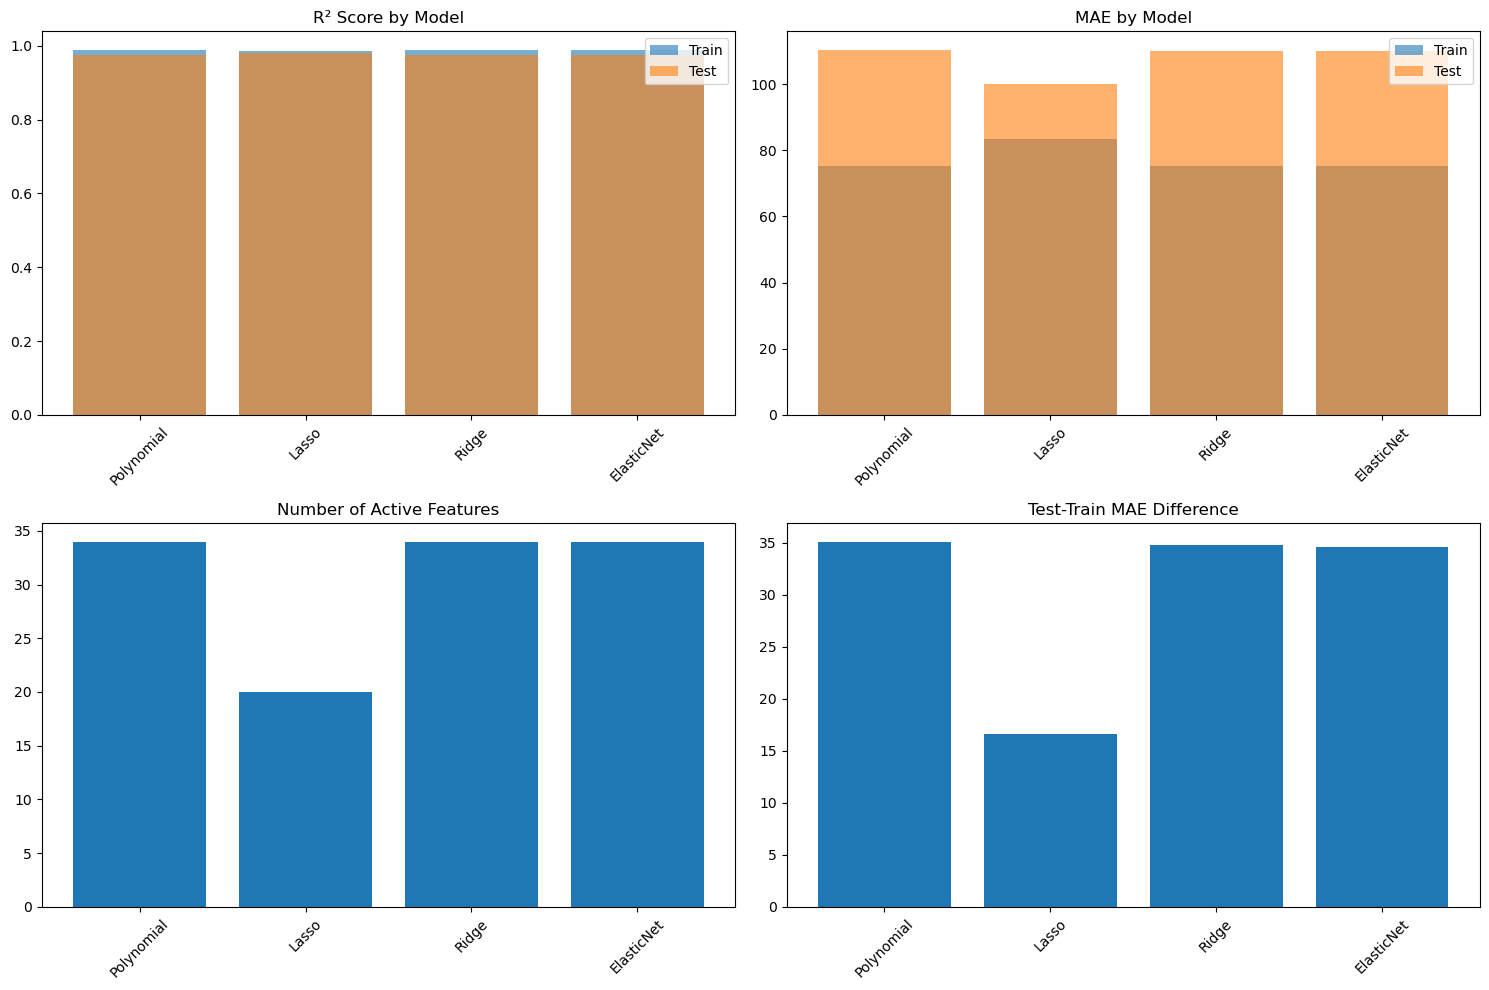

In [23]:
# Ваш код здесь
# Создаем сводную таблицу результатов
results_data = {
    'Model': ['Polynomial', 'Lasso', 'Ridge', 'ElasticNet'],
    'Train_R2': [0.990, 0.987, 0.990, 0.990],
    'Test_R2': [0.975, 0.981, 0.975, 0.975],
    'Train_MAE': [75.35, 83.38, 75.32, 75.35],
    'Test_MAE': [110.47, 99.96, 110.14, 109.96],
    'Active_Features': [34, 20, 34, 34]
}

results_df = pd.DataFrame(results_data)
print("Сводная таблица результатов:")
print(results_df)

# Визуализация метрик
plt.figure(figsize=(15, 10))

# R2 scores
plt.subplot(2, 2, 1)
plt.bar(results_df['Model'], results_df['Train_R2'], label='Train', alpha=0.6)
plt.bar(results_df['Model'], results_df['Test_R2'], label='Test', alpha=0.6)
plt.title('R² Score by Model')
plt.legend()
plt.xticks(rotation=45)

# MAE scores
plt.subplot(2, 2, 2)
plt.bar(results_df['Model'], results_df['Train_MAE'], label='Train', alpha=0.6)
plt.bar(results_df['Model'], results_df['Test_MAE'], label='Test', alpha=0.6)
plt.title('MAE by Model')
plt.legend()
plt.xticks(rotation=45)

# Feature counts
plt.subplot(2, 2, 3)
plt.bar(results_df['Model'], results_df['Active_Features'])
plt.title('Number of Active Features')
plt.xticks(rotation=45)

# Train-Test MAE difference
results_df['MAE_diff'] = results_df['Test_MAE'] - results_df['Train_MAE']
plt.subplot(2, 2, 4)
plt.bar(results_df['Model'], results_df['MAE_diff'])
plt.title('Test-Train MAE Difference')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

> *Ваши выводы здесь*
> Были проведены эксперименты с моделями полиномиальной регрессии:
>
> простая модель без регуляризации
>
> модель с регуляризацией L1 (Lasso)
>
> модель с регуляризацией L2 (Ridge)
>
> модель со смешанной регуляризацией (ElasticNet)
>
> При формировании первой модели были отобраны признаки со значимой корреляцией с целевой переменной. Оставлены базовые признаки ['Por', 'AI', 'VR', 'Brittle'], которые в дальнейшем использовались во всех моделях. Полиномиальные признаки, полученные на первой модели, для всех последующих моделей использовались как входные переменные.
>
> В качестве метрик выбраны MAE и R². MAE (Mean Absolute Error) выбрана как интерпретируемая метрика, показывающая среднюю абсолютную ошибку предсказания в исходных единицах измерения. R² выбран для оценки доли объясненной дисперсии и общего качества подгонки модели. Подбор коэффициентов регуляризации проводился с помощью метода GridSearchCV.
>
> Основные результаты экспериментов:
>
> Базовая полиномиальная модель показала хорошие результаты (Test R²=0.975), но имела признаки переобучения Lasso-регрессия продемонстрировала лучшие показатели (Test R²=0.981, Test MAE=99.96) и сократила число признаков до 20 Ridge-регрессия не улучшила результаты базовой модели, сохранив все признаки ElasticNet, несмотря на высокий коэффициент l1_ratio, не произвел отбор признаков и показал результаты, близкие к базовой модели Оптимальной можно считать модель Lasso-регрессии, так как она:
>
> Обеспечивает наилучшие метрики качества Производит эффективный отбор полиномиальных признаков Демонстрирует меньшую склонность к переобучению Создает более простую и интерпретируемую модель Данное исследование подтверждает эффективность L1-регуляризации для задач с полиномиальными признаками, где важно не только качество предсказаний, но и простота модели.